In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
%matplotlib inline

In [2]:
client = pymongo.MongoClient("localhost")
db = client["lianjia"]
fangyuan = db["fangyuanbigsz"]

In [3]:
data = pd.DataFrame(list(fangyuan.find()))

In [4]:
data.head()

,_id,url,交易权属,供暖方式,关注人数,套内面积,小区,小区编号,带看次数,建筑年代,...,板块,板块url,梯户比例,浏览次数,行政区域,行政区域url,装修情况,调价次数,配备电梯,链家编号
0,5b2400cde0d7211d13019004,https://sz.lianjia.com/chengjiao/105101181103....,商品房,,6,暂无数据,名城国际广场,2411063075599,0,70年,...,布吉大芬,https://sz.lianjia.com/chengjiao/bujidafen/,四梯二十二户,305,龙岗区,https://sz.lianjia.com/chengjiao/longgangqu/,其他,0,有,105101181103
1,5b2400cde0d7211d13019006,https://sz.lianjia.com/chengjiao/105101153657....,商品房,,0,暂无数据,名城国际广场,2411063075599,0,70年,...,布吉大芬,https://sz.lianjia.com/chengjiao/bujidafen/,四梯二十二户,暂无数据,龙岗区,https://sz.lianjia.com/chengjiao/longgangqu/,其他,0,有,105101153657
2,5b2400cde0d7211d13019008,https://sz.lianjia.com/chengjiao/105101158301....,商品房,,2,暂无数据,名城国际广场,2411063075599,0,70年,...,布吉大芬,https://sz.lianjia.com/chengjiao/bujidafen/,四梯二十二户,284,龙岗区,https://sz.lianjia.com/chengjiao/longgangqu/,其他,0,有,105101158301
3,5b2400cde0d7211d1301900a,https://sz.lianjia.com/chengjiao/105101283981....,商品房,,4,暂无数据,名城国际广场,2411063075599,0,70年,...,布吉大芬,https://sz.lianjia.com/chengjiao/bujidafen/,四梯二十二户,295,龙岗区,https://sz.lianjia.com/chengjiao/longgangqu/,其他,1,有,105101283981
4,5b2400cde0d7211d1301900c,https://sz.lianjia.com/chengjiao/105101188483....,商品房,,74,暂无数据,名城国际广场,2411063075599,0,70年,...,布吉大芬,https://sz.lianjia.com/chengjiao/bujidafen/,一梯四户,2049,龙岗区,https://sz.lianjia.com/chengjiao/longgangqu/,其他,2,无,105101188483


In [5]:
data.to_csv('szHousePrice.csv',encoding='utf-8')

In [6]:
df = pd.read_csv('szHousePrice.csv',low_memory=False,index_col=0)

In [7]:
data.shape

(17637, 36)

In [11]:
data.columns

Index(['_id', 'url', '交易权属', '供暖方式', '关注人数', '套内面积', '小区', '小区编号', '带看次数',
       '建筑年代', '建筑类型', '建筑结构', '建筑面积', '成交周期', '成交均价', '成交总价', '成交时间', '户型结构',
       '房屋年限', '房屋户型', '房屋朝向', '房屋用途', '房权所属', '所在楼层', '挂牌价', '挂牌时间', '板块',
       '板块url', '梯户比例', '浏览次数', '行政区域', '行政区域url', '装修情况', '调价次数', '配备电梯',
       '链家编号'],
      dtype='object')

In [8]:
df1 = data.loc[:,["成交时间","成交均价"]]

In [10]:
df1.head()

,成交时间,成交均价
0,2018.01.25,32749
1,2018.01.10,31306
2,2018.01.06,29051
3,2018.04.17,34192
4,2018.05.14,28252


In [11]:
df1.sort_values(by="成交时间",inplace=True)

In [15]:
df1["成交时间"].values

array(['2015.08.18', '2015.08.18', '2015.08.19', ..., '2018.06.01',
       '2018.06.01', '2018.06.01'], dtype=object)

In [16]:
df1["成交均价"] = df1["成交均价"].astype("int32")

In [17]:
price = df1.groupby("成交时间").mean()
price.head()

,成交均价
成交时间,
2015.08.18,37490.000000
2015.08.19,59096.500000
2015.08.20,41171.750000
2015.08.21,31528.666667
2015.08.22,18403.000000


In [18]:
price.values.tolist()
price.index = pd.to_datetime(price.index)

In [19]:
price.index

DatetimeIndex(['2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
               '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25',
               '2015-08-26', '2015-08-27',
               ...
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26',
               '2018-05-27', '2018-05-28', '2018-05-29', '2018-05-30',
               '2018-05-31', '2018-06-01'],
              dtype='datetime64[ns]', name='成交时间', length=988, freq=None)

In [20]:
price["成交均价"] = price["成交均价"].apply(lambda x : int(x))

In [21]:
price = price.resample("2W").mean()

In [27]:
from pyecharts import Line
attr = price.index
v = price["成交均价"].values.tolist()
line = Line("折线图示例")
line.add("深圳房价走势", attr, v, is_smooth=True, mark_line=["min","max", "average"])
line.render('fangjia.html')

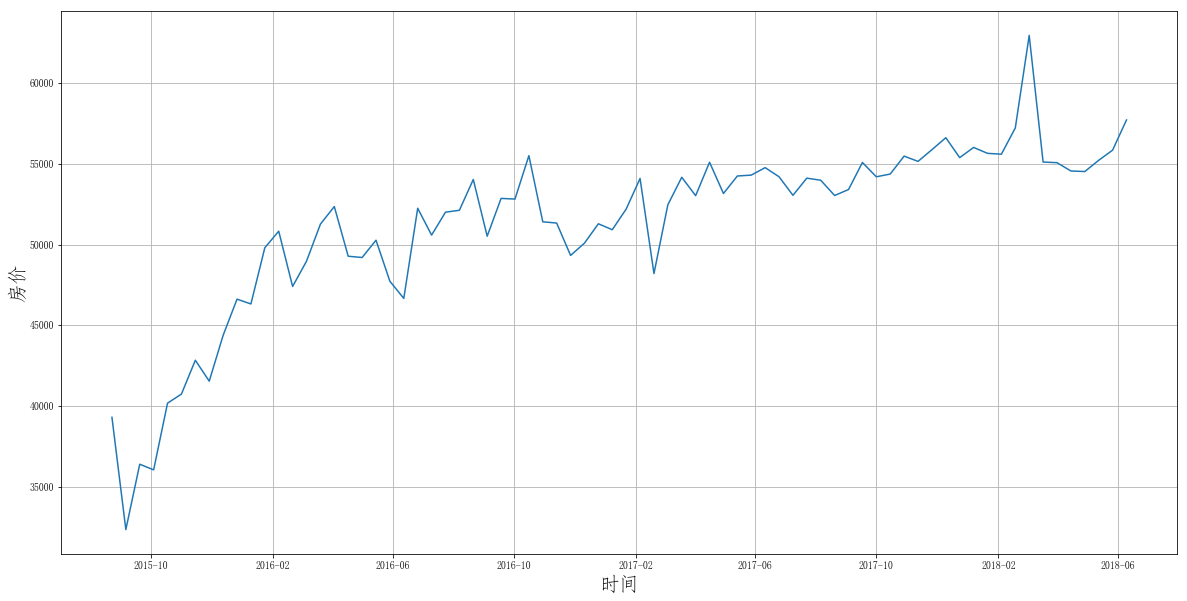

In [28]:
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.figure(figsize=(20,10))
plt.plot(price)
plt.xlabel("时间",fontsize=20)
plt.ylabel("房价",fontsize=20)
plt.grid()